<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
    <!-- Logo positioned in the right corner -->
    <img src="logo.png" style="position: absolute; top: 10px; right: 10px; width: 100px;"/>

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 5%; transform: translateX(-50%); color: grey; text-align: left;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>

<h1 style="color:purple; text-align:center;">Clustering Snack Preferences</h1>



<h1 style="color:red;">Why Use Clustering?</h1>

**Grouping Similar Snacks:**

Imagine you have a big collection of snacks. Some are very sweet, some are less sweet but more crunchy, and so on. Clustering helps us automatically group these snacks into categories based on their sweetness and crunchiness. We don’t tell the computer what the categories should be; it finds the best way to group them by itself.

**Finding Patterns:**

By grouping snacks, we can identify patterns or common traits. For example, you might find that all snacks with high sweetness and low crunchiness fall into one group, while those with low sweetness and high crunchiness fall into another group.

**Making Sense of Data:**

With lots of data, it can be hard to see patterns just by looking at numbers. Clustering organizes the data into clear groups, making it easier to understand the different types of snacks.

**Improving Decisions:**

Once snacks are grouped, you can make decisions based on these groups. For example, you might want to target a specific group with new product designs or marketing strategies.

![K-means Clustering](https://reformship.github.io/pages/1capacity/1model/images/kmeans.gif)

<h1 style="color:red;">Problem Statement</h1>

**Purpose:** Clustering helps us sort snacks into groups based on their sweetness and crunchiness so we can see which snacks are similar to each other.

**Benefit:** This makes it easier to understand the variety of snacks we have and find patterns or trends among them.

By using clustering, we turn a messy pile of data into organized groups that are easier to analyze and make decisions with.


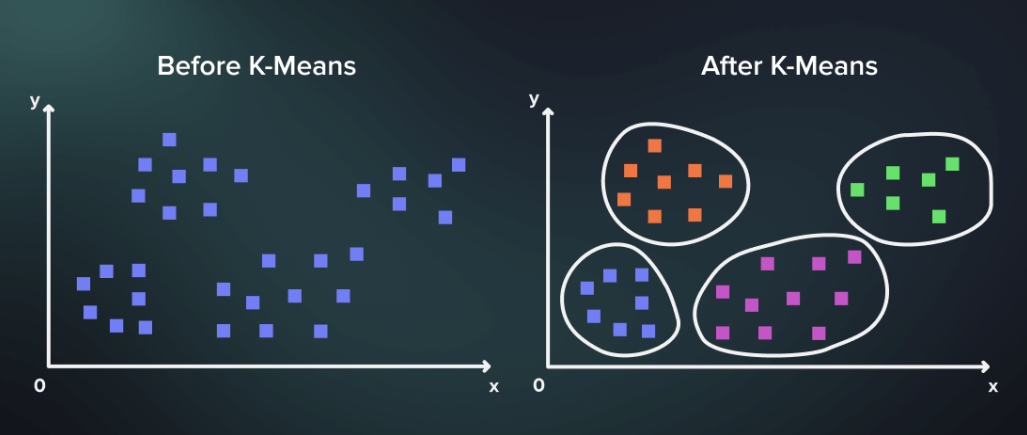

# Import Necessary Libraries

To begin our analysis, we need to import several libraries:
- `pandas` for handling data in DataFrame format.
- `matplotlib.pyplot` for creating visualizations.
- `sklearn.cluster.KMeans` for performing K-means clustering.
- `sklearn.preprocessing.StandardScaler` for standardizing our data.
- `sklearn.metrics.silhouette_score` for evaluating the quality of our clusters.


In [2]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Dataset from CSV

We'll load the dataset containing information about snacks into a DataFrame. This dataset includes features such as Sweetness Level and Crunchiness Level.

**Displaying the First Few Rows:**
This step helps us understand the structure and contents of the dataset.

**Displaying Basic Statistics:**
This provides an overview of the dataset's numerical features, helping us identify any necessary preprocessing steps.


- df = pd.read_csv('snacks_clustering.csv'): This loads the snack data from a CSV file into a DataFrame (a table structure where we can manipulate and analyze data).
- df.head(): Shows the first few rows of the dataset to get an idea of what the data looks like.
- df.describe(): Displays important summary statistics, like the average sweetness or crunchiness levels, to better understand the dataset.


In [3]:
# Load Dataset from CSV
df = pd.read_csv('snacks_clustering.csv')

In [4]:
# Display the First Few Rows of the Dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      Snack Name  Sweetness Level  Crunchiness Level
0  Chocolate Bar                8                  6
1    Gummy Bears                9                  3
2   Potato Chips                2                  9
3        Cookies                7                  5
4     Candy Cane               10                  2


In [5]:
# Display Basic Statistics of the Dataset
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
       Sweetness Level  Crunchiness Level
count         62.00000          62.000000
mean           6.33871           5.048387
std            2.57315           2.363849
min            1.00000           1.000000
25%            4.00000           3.000000
50%            7.00000           5.000000
75%            8.00000           7.000000
max           10.00000           9.000000


# Standardize Features

Before applying K-means clustering, we standardize the features to ensure that they have a mean of 0 and a standard deviation of 1. This helps improve the performance and accuracy of the clustering algorithm by treating all features equally.


- StandardScaler: It’s important to make sure that all features (like sweetness and crunchiness) are on the same scale. For example, if one feature ranges from 1 to 100 and another from 0 to 1, the algorithm could be biased toward the larger numbers.
- fit_transform: This function adjusts the sweetness and crunchiness values so they all fit between similar ranges, making the clustering more accurate.

In [6]:
# Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Sweetness Level', 'Crunchiness Level']])

# Perform K-means Clustering

We apply the K-means algorithm to group snacks into clusters based on their standardized Sweetness Level and Crunchiness Level. 

**Choosing Number of Clusters:**
Here, we have selected 2 clusters. This number can be adjusted based on the dataset and our analysis requirements.

**Assigning Clusters:**
Each snack is assigned to a cluster, and this information is stored in the 'Cluster' column of our DataFrame.

**Silhouette Score:**
We calculate the Silhouette Score to evaluate the quality of our clustering. A higher score indicates that the clusters are well-separated.


- n_clusters = 2: We want to group snacks into 2 categories or clusters. You can change this number to create more or fewer groups.
- kmeans = KMeans(...): This creates the K-means model that will help us find the clusters.
- fit_predict(): The algorithm analyzes the data and assigns each snack to one of the clusters. This result is stored in the new Cluster column.
- silhouette_score: This score helps us measure how good our clustering is. A higher number means the clusters are well-separated and meaningful.

In [7]:
# Perform K-means Clustering
n_clusters = 2  # Adjust this number if necessary
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\MADHAVI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Calculate and Print Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'\nSilhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}')



Silhouette Score for 2 clusters: 0.59


# Visualize Clusters

Visualization helps us understand the clustering results better. We plot the clusters and their centers to see how the snacks are grouped:

- **Scatter Plot of Clusters:** Each cluster is represented with a different color. This allows us to see how snacks are distributed among the clusters.
- **Cluster Centers:** These are the central points of each cluster, marked with yellow stars. They represent the average feature values for each cluster.

**Customization:**
We remove grid lines to keep the plot clean and focused on the clusters and their centers.


- plt.scatter(...): This creates a scatter plot to visualize our clusters. Snacks in different clusters will be shown in different colors (blue or red here).
- cluster_centers_: This shows the center point of each cluster. These centers help represent the "average" snack in each group.
- plt.xlabel() / plt.ylabel(): Adds labels to the X-axis (Sweetness Level) and Y-axis (Crunchiness Level).
- plt.legend(): Displays a small box showing which color represents which cluster.
- plt.title(): Adds a title to the graph.
- plt.show(): Displays the plot on the screen.


In [9]:
# Visualize Clusters
plt.figure(figsize=(10, 6))  # Create a figure with specified size

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
# Define colors for different clusters
colors = ['blue', 'red', 'green']


### Plotting Each Cluster

1. **Loop Through Clusters:**
   - We examine each cluster one by one, using different colors to represent them.

2. **Get Data for Each Cluster:**
   - For each cluster, we select the data points that belong to it.

3. **Plot the Data Points:**
   - We create a scatter plot where:
     - The **X-axis** shows the Sweetness Level.
     - The **Y-axis** shows the Crunchiness Level.
     - Each cluster is shown in a different color.
     - We add labels to identify each cluster.
     - The points are slightly see-through with black borders and are sized for better visibility.

### Plotting Cluster Centers

4. **Plot Cluster Centers:**
   - We also plot the centers of each cluster:
     - These centers are shown as yellow stars.
     - They are plotted with larger markers and labeled as **Cluster Centers**.
     - The positions are adjusted back to their original scale for accurate placement.

### Adding Labels and Title

5. **Label the Axes:**
   - We add labels to the X-axis and Y-axis to indicate Sweetness Level and Crunchiness Level, respectively.

6. **Add Legend and Title:**
   - A legend is added to explain the colors and markers used in the plot.
   - The plot is given a title, "Snack Clustering with Cluster Centers," to describe what it represents.

### Final Touches

7. **Remove Grid Lines:**
   - Grid lines are turned off to make the plot look cleaner and less cluttered.

8. **Show the Plot:**
   - Finally, we display the plot so we can see the clusters and their centers.


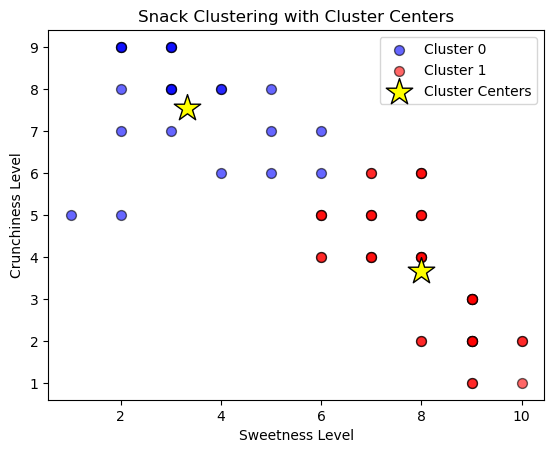

In [11]:
# Plot each cluster
for cluster, color in zip(range(n_clusters), colors):
    cluster_data = df[df['Cluster'] == cluster]  # Filter data for each cluster
    plt.scatter(
        cluster_data['Sweetness Level'],
        cluster_data['Crunchiness Level'],
        c=color,
        label=f'Cluster {cluster}',  # Label each cluster with its number
        alpha=0.6,  # Set transparency for better visualization
        edgecolor='k',  # Add black edge color to markers
        s=50  # Size of the markers
    )
    # Plot Cluster Centers
plt.scatter(
    kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],  # X-coordinates of cluster centers (denormalized)
    kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],  # Y-coordinates of cluster centers (denormalized)
    s=400,  # Size of the cluster center markers
    c='yellow',  # Color for cluster centers
    marker='*',  # Marker style for cluster centers
    label='Cluster Centers',  # Label for cluster centers
    edgecolor='k'  # Add black edge color to markers
)

# Add Labels and Title
plt.xlabel('Sweetness Level')  # Label for the x-axis
plt.ylabel('Crunchiness Level')  # Label for the y-axis
plt.legend()  # Show legend on the plot
plt.title('Snack Clustering with Cluster Centers')  # Title of the plot

# Remove horizontal and vertical lines
plt.grid(False)  # Disable grid lines

# Show the Plot
plt.show()



# Insights from Clustering

After performing K-means clustering on the snacks data, we have identified distinct groups based on sweetness and crunchiness. Here are some insights:

- **Cluster 0:** Snacks with high sweetness and low crunchiness.
- **Cluster 1:** Snacks with low sweetness and high crunchiness.

These insights can help in understanding consumer preferences and designing targeted marketing strategies.


## 🔍 **Clustering** groups similar items together. 
## 📊 Discover patterns and insights from your data!


# Conclusion:

**Simple and Fast**: K-means is easy to understand and works quickly, even with lots of data. It groups things into clusters based on how close they are to each other.

**Clear Groups**: K-means forms clear, round clusters that are easy to see and explain. This makes it a great starting point for many projects.

**Works with Large Data**: If you have a big dataset, K-means handles it well and still gives good results without taking too long.

**Adjustable Clusters**: You can choose how many groups (clusters) you want, making it flexible for different types of projects.

Other methods like DBSCAN are great for more complex shapes, but K-means is often the easiest and most straightforward for most data.

<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
  

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 20%; transform: translateX(-50%); color: grey; text-align: centre;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>